In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('UpdatedResumeDataSet.csv')

In [5]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [7]:
df.shape

(962, 2)

## EXPLORING CATEGORIES

In [17]:
df['Category'].value_counts()


Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

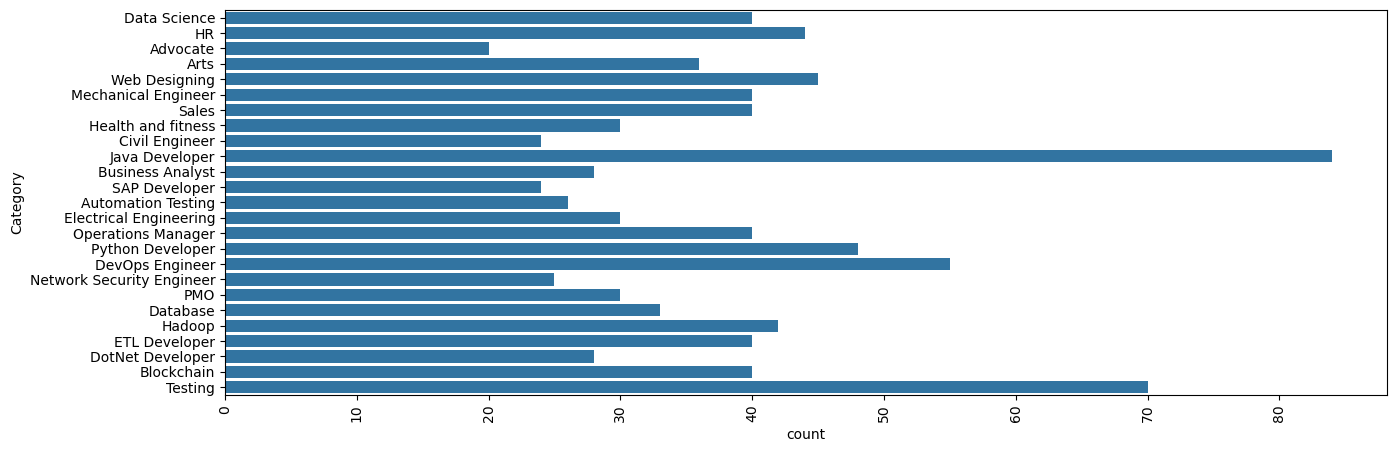

In [21]:
plt.figure(figsize=(15,5))
sns.countplot(df['Category'])
plt.xticks(rotation = 90)
plt.show()

In [29]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

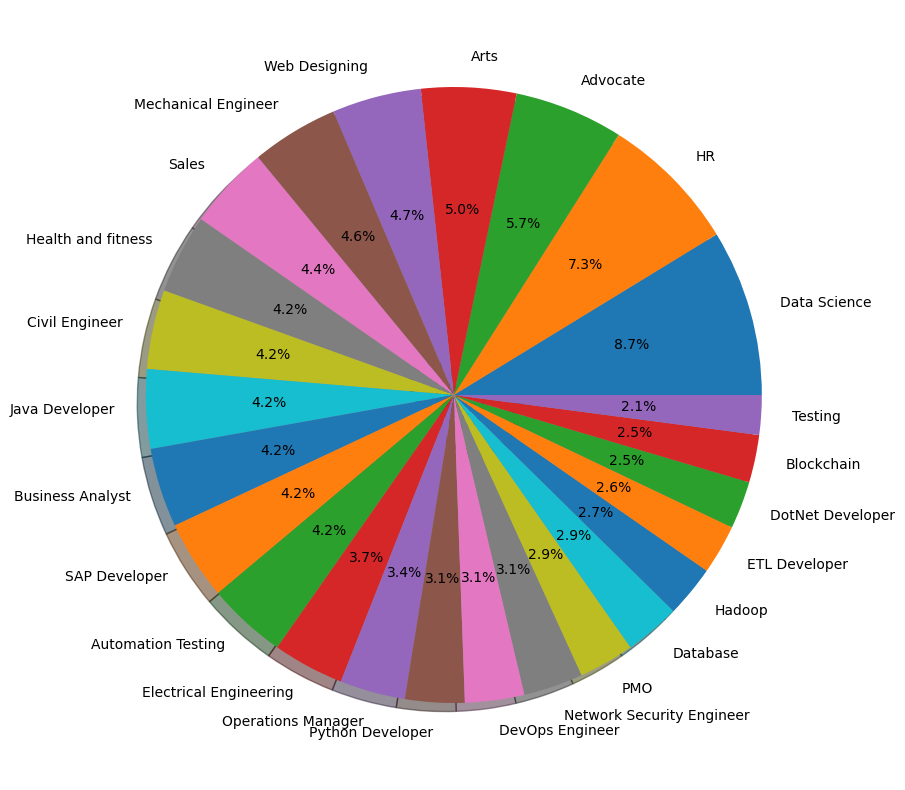

In [43]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize=(15,10))
plt.pie(counts,labels=labels,autopct = '%1.1f%%', shadow =True)
plt.show()

## Exploring Resume

In [50]:
df['Category'][0]


'Data Science'

## Data Cleaning

In [87]:
import re 

def cleanResume(txt):
    cleanText = re.sub(r'http\S+\s*', ' ', txt)   # remove links
    cleanText = re.sub(r'RT|cc', ' ', cleanText)  # remove RT and cc
    cleanText = re.sub(r'#\S+', ' ', cleanText)   # remove hashtags
    cleanText = re.sub(r'@\S+', ' ', cleanText)   # remove mentions
    cleanText = re.sub(r'[%s]' % re.escape(r"""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)  # remove punctuation
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText)  # remove non-ASCII chars
    cleanText = re.sub(r'\s+', ' ', cleanText)  # collapse multiple spaces
    return cleanText


In [89]:
cleanResume("Check my ##### ##no resume at http://example.com/resume.pdf please and @gmail.com")

'Check my resume at please and '

In [99]:
# Apply the cleanResume function to every row in the 'Resume' column
# and store the cleaned text into a new column 'Resume '
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))


In [105]:
df['Resume']

0      Skills Programming Languages Python pandas num...
1      Education Details May 2013 to May 2017 B E UIT...
2      Areas of Interest Deep Learning Control System...
3      Skills R Python SAP HANA Tableau SAP HANA SQL ...
4      Education Details MCA YMCAUST Faridabad Haryan...
                             ...                        
957    Computer Skills Proficient in MS office Word B...
958     Willingness to a ept the challenges Positive ...
959    PERSONAL SKILLS Quick learner Eagerness to lea...
960    COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...
961    Skill Set OS Windows XP 7 8 8 1 10 Database MY...
Name: Resume, Length: 962, dtype: object

## Words into Categorical Values

In [112]:
from sklearn.preprocessing import LabelEncoder  # import LabelEncoder to convert text labels into numbers
le = LabelEncoder()                              # create a LabelEncoder object

In [116]:
le.fit(df['Category'])                               # learn all unique categories from the 'Category' column
df['Category'] = le.transform(df['Category'])         # replace category names with numeric labels (e.g., 'IT' → 0, 'HR' → 1)

In [122]:

print (df['Category'])

0       6
1       6
2       6
3       6
4       6
       ..
957    23
958    23
959    23
960    23
961    23
Name: Category, Length: 962, dtype: int32


In [124]:
df['Category'].unique()   # display the transformed 'Category' column with encoded numbers

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

### Numbers are assigned based on the alphabetical order of the category names, starting from 0. ✅

In [126]:
# array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
#        'Mechanical Engineer', 'Sales', 'Health and fitness',
#        'Civil Engineer', 'Java Developer', 'Business Analyst',
#        'SAP Developer', 'Automation Testing', 'Electrical Engineering',
#        'Operations Manager', 'Python Developer', 'DevOps Engineer',
#        'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
#        'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
#       dtype=object)

## Vectorization

In [137]:
from sklearn.feature_extraction.text import TfidfVectorizer   # import the TF-IDF Vectorizer, a tool to convert text into numerical feature vectors

# Create a TF-IDF vectorizer object:
# - TF-IDF stands for Term Frequency – Inverse Document Frequency.
# - It transforms text into numerical vectors where:
#     * Term Frequency (TF): counts how often a word appears in a single document (resume).
#     * Inverse Document Frequency (IDF): reduces the weight of words that appear
#       very frequently across many documents (e.g., "skills", "experience"), because they
#       don’t help distinguish one resume from another.
# - The result: important, unique words (like "TensorFlow", "Kubernetes", "NLP") get higher
#   weights, while common filler words get lower weights.
# - The parameter stop_words='english' removes standard English stopwords like "the", "is", "and",
#   since they add little to no meaning for text analysis.
tfidf = TfidfVectorizer(stop_words='english')

# Learn the vocabulary and IDF values from the resumes:
# - tfidf.fit() scans through the entire 'Resume' column in your DataFrame.
# - It identifies all unique meaningful words and builds a "vocabulary dictionary".
# - At the same time, it calculates IDF values (how rare/common each word is across resumes).
# - After this step, the vectorizer knows which words exist in the dataset and how to weight them.
tfidf.fit(df['Resume'])

# Transform the text data into TF-IDF feature vectors:
# - tfidf.transform() takes each resume (string) and converts it into a sparse numerical vector.
# - Each vector has one position per word in the vocabulary, with the value being the TF-IDF weight.
# - For example: if the vocabulary has 5000 unique words, each resume is turned into a 5000-dimensional vector.
# - The result is a sparse matrix (X), where rows = resumes and columns = words/features.
X = tfidf.transform(df['Resume'])

# Display the shape of the TF-IDF feature matrix:
# - X.shape[0] = number of resumes (rows).
# - X.shape[1] = number of unique words/features extracted from all resumes.
# - Example: (1000, 5000) means 1000 resumes, represented by 5000 unique words.
print(X.shape)


(962, 7351)


## Splitting

In [144]:
from sklearn.model_selection import train_test_split   # import function to split data into training and testing sets

# Split the dataset into training and testing parts:
# - X → the feature matrix (TF-IDF vectors of resumes).
# - df['Category'] → the target labels (encoded job categories).
# - test_size=0.2 means 20% of the data will be kept aside as the test set,
#   and 80% will be used for training the model.
# - random_state=42 ensures reproducibility (the split will always be the same
#   if you run the code again with the same seed).
# - The function returns 4 subsets:
#     * X_train: training features
#     * X_test: testing features
#     * y_train: training labels
#     * y_test: testing labels
X_train, X_test, y_train, y_test = train_test_split(X, df['Category'], test_size=0.2, random_state=42)



## Now let's train model 

In [155]:
# Import K-Nearest Neighbors Classifier from scikit-learn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier   # Used to extend classifiers to multi-class problems
from sklearn.metrics import accuracy_score           # Used to calculate accuracy of predictions


# Step 1: Create the KNN classifier object
# By default, it uses 5 neighbors and Euclidean distance
# Here, we wrap KNN inside OneVsRestClassifier:
#   - This means if there are multiple categories, it will train one KNN model per category
#   - Each model predicts "is it this class or not?"
#   - The final decision is based on which model is most confident
clf = OneVsRestClassifier(KNeighborsClassifier())

# Step 2: Train (fit) the classifier on the training data
# For KNN, "fit" just stores the training data (X_train, y_train)
clf.fit(X_train, y_train)  

# Step 3: Use the trained classifier to predict labels for the test set
# For each point in X_test, the algorithm:
#   - Calculates distance to all training points
#   - Finds the 5 closest (neighbors)
#   - Assigns the majority class of those neighbors
ypred = clf.predict(X_test)  

# Step 4: Print the predicted labels for the test set
print(ypred)

# Step 5: Calculate and print accuracy of the model
# Accuracy = (Number of correct predictions / Total predictions)
print("Accuracy:", accuracy_score(y_test, ypred))


[15 15 15 13 14 17 16  2  0 14 13 12 16 23 20  5  6  4 10  9 19  1 10 23
 23 21 22 22  2 12 18  1  8 24 11 23  7 12 24  8 18  6  8 19 24 23 21  1
 15  4 15 22 11  5 15 13  1 19  5 12 22 22 20 24 21 18 12 10 10 20 10  8
  9 21 17 21  0 17 16 14 15 11 11  8 20  3 19  8  0  2  9 10  2 23 20 20
 23 12 18 12  7 16  8 14 18  3 14 19 14 14 15 18  8  2 21 18 23 10 23  5
 11 15 12  3  5  3  7 12 19  8 20 19  3 15  9 19  1 23 21  5 20 15 16  7
  7  8 15 18  1 15 13 20  7  4 18 11  5 15  5 12  9 22 18 21  8 23  4 12
 24 16 15 22  8 22  3 16 23 23 12  7 16 18  5  3 18  8 23 23 20 21  6  7
 23]
Accuracy: 0.9844559585492227


## Save files

In [168]:
import pickle  # Importing the pickle module to save (serialize) Python objects

# Save the fitted TF-IDF vectorizer (converts text into numerical features for ML models)
pickle.dump(tfidf, open('tfidf.pkl','wb'))  

# Save the trained KNN classifier (the actual ML model that predicts based on resume data)
pickle.dump(clf, open('clf.pkl', 'wb'))  

# Save the Label Encoder (used to convert categorical job labels into numeric values during training)
pickle.dump(le, open("encoder.pkl",'wb'))


## Prediction System

In [175]:
# Function to predict the category of a resume based on its content
def pred(input_resume):
    
    # Step 1: Preprocess the resume text
    # cleanResume() is a custom function that:
    # - removes unwanted characters or formatting (like punctuation, HTML tags)
    # - converts text to lowercase
    # - removes stopwords (common words like "the", "and", "is")
    # - optionally performs stemming or lemmatization
    # This prepares the text for vectorization so that the ML model can interpret it.
    cleaned_text = cleanResume(input_resume) 

    # Step 2: Convert the cleaned text into numerical form
    # tfidf.transform() uses the TF-IDF vectorizer (trained on your dataset)
    # TF-IDF (Term Frequency-Inverse Document Frequency) converts text into numerical feature vectors
    # - Each word gets a weight based on how important it is in this resume compared to all resumes.
    # - The result is a sparse matrix (mostly zeros) because most words don't appear in a single resume.
    vectorized_text = tfidf.transform([cleaned_text])
    
    # Step 3: Convert sparse matrix to dense array
    # Some machine learning algorithms (like KNN) require dense arrays as input.
    # vectorized_text.toarray() converts the sparse matrix to a regular NumPy array.
    vectorized_text = vectorized_text.toarray()

    # Step 4: Predict the category using the trained KNN classifier
    # clf.predict() takes the feature vector as input and returns the predicted label.
    # - The output is usually a numeric label (e.g., 0, 1, 2) representing the category.
    predicted_category = clf.predict(vectorized_text)

    # Step 5: Convert the numeric label back to a human-readable category name
    # le.inverse_transform() uses a LabelEncoder (fitted on your training data)
    # - This maps numeric labels back to their original string names (like 'Data Scientist', 'Web Developer').
    predicted_category_name = le.inverse_transform(predicted_category)

    # Step 6: Return the predicted category name
    # predicted_category_name is an array, so [0] gets the first element as the result.
    return predicted_category_name[0]  


In [177]:
myresume = """I am a data scientist specializing in machine
learning, deep learning, and computer vision. With
a strong background in mathematics, statistics,
and programming, I am passionate about
uncovering hidden patterns and insights in data.
I have extensive experience in developing
predictive models, implementing deep learning
algorithms, and designing computer vision
systems. My technical skills include proficiency in
Python, Sklearn, TensorFlow, and PyTorch.
What sets me apart is my ability to effectively
communicate complex concepts to diverse
audiences. I excel in translating technical insights
into actionable recommendations that drive
informed decision-making.
If you're looking for a dedicated and versatile data
scientist to collaborate on impactful projects, I am
eager to contribute my expertise. Let's harness the
power of data together to unlock new possibilities
and shape a better future.
Contact & Sources
Email: 611noorsaeed@gmail.com
Phone: 03442826192
Github: https://github.com/611noorsaeed
Linkdin: https://www.linkedin.com/in/noor-saeed654a23263/
Blogs: https://medium.com/@611noorsaeed
Youtube: Artificial Intelligence
ABOUT ME
WORK EXPERIENCE
SKILLES
NOOR SAEED
LANGUAGES
English
Urdu
Hindi
I am a versatile data scientist with expertise in a wide
range of projects, including machine learning,
recommendation systems, deep learning, and computer
vision. Throughout my career, I have successfully
developed and deployed various machine learning models
to solve complex problems and drive data-driven
decision-making
Machine Learnine
Deep Learning
Computer Vision
Recommendation Systems
Data Visualization
Programming Languages (Python, SQL)
Data Preprocessing and Feature Engineering
Model Evaluation and Deployment
Statistical Analysis
Communication and Collaboration
"""
pred(myresume)

'Data Science'

In [179]:
myresume = """
Jane Smith is a certified personal trainer with over 5 years of experience in helping individuals achieve their fitness goals. Specializing in weight loss, strength training, and sports conditioning, Jane has developed personalized workout routines for clients of all ages and fitness levels. She has extensive knowledge in nutrition and exercise science, and uses this to create holistic health and fitness programs that are tailored to individual needs.

Jane holds a degree in Exercise Science and is a certified trainer through the National Academy of Sports Medicine (NASM). She has worked with athletes, seniors, and individuals with chronic health conditions, helping them improve their physical well-being and overall quality of life.

Her expertise includes:
- Weight Loss and Body Composition
- Strength Training and Resistance Exercises
- Cardio Conditioning
- Nutrition Coaching and Meal Planning
- Injury Prevention and Rehabilitation
- Functional Movement and Flexibility Training
- Group Fitness Classes

Certifications:
- Certified Personal Trainer, NASM
- CPR and First Aid Certified
- Yoga Instructor (200-Hour Certification)

Education:
BSc in Exercise Science, ABC University, 2014-2018

Work Experience:
- Personal Trainer at XYZ Fitness Gym (2018-Present)
- Fitness Coach at Wellness Center (2016-2018)

Languages:
- English (Fluent)
- Spanish (Conversational)
"""

# Now, test the model with the Health and Fitness-focused resume
pred(myresume)

'Health and fitness'